### **Step 1: Initial cleansing**

In [1]:
# load pandas package and data
import pandas as pd
df = pd.read_csv('food_wishes_from2012.csv')
# check what the data looks like
df.head(3)

,Unnamed: 0,video_id,video_title,upload_date,view_count,like_count,comment_count
0,0,CQPLo8hECWg,Twice Baked Potatoes -- How to Make Fancy Stuf...,2012-12-15,4194592,47213,1950
1,1,TsrTU3CJn2c,Irish Shepherd's Pie - Classic Shepherd Pie fo...,2012-03-05,2730866,44230,2843
2,2,wRtGM3f-UBc,How to Flip Food in a Pan Like a Chef!,2012-10-04,2764323,17837,1382


In [2]:
# looks like there's an unwanted column at the very start
# need to remove it
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
# check the data types of columns
df.dtypes

video_id         object
video_title      object
upload_date      object
view_count        int64
like_count        int64
comment_count     int64
dtype: object

In [4]:
# the 'upload date' coulum should be in 'datetime' format but is currently showing as 'object'
# need to parse it to the correct format
df['upload_date'] = pd.to_datetime(df['upload_date'], format='%Y-%m-%d')

In [5]:
# also would be nice to single out the year, month , year-month and day only for finer analyses
df['upload_year'] = df['upload_date'].dt.year
df['upload_month'] = df['upload_date'].dt.month
df['upload_day'] = df['upload_date'].dt.day
df['upload_yearmonth'] = df['upload_date'].dt.to_period('M')

In [6]:
# check if there are any duplicate records in this dataframe
if df.shape[0] - len(df['video_id'].unique()) > 0:
    print('you have duplicates')
else:
    print('you don\'t have duplicates')

you have duplicates


In [7]:
# looks like there are duplicates
# now need to see what the duplicate records look like
df['duplicates'] = df['video_id'].duplicated(keep=False)
duplicates = df[df['duplicates'] == True]
print(f'there are {duplicates.shape[0]} records in the duplicates dataframe')
duplicates.groupby(duplicates.columns.values[0]).count()

there are 28 records in the duplicates dataframe


,video_title,upload_date,view_count,like_count,comment_count,upload_year,upload_month,upload_day,upload_yearmonth,duplicates
video_id,,,,,,,,,,
4i-blr330n4,2,2,2,2,2,2,2,2,2,2
8SLbT652IiQ,2,2,2,2,2,2,2,2,2,2
DE8EnTymPso,2,2,2,2,2,2,2,2,2,2
EVuiTbde80k,2,2,2,2,2,2,2,2,2,2
KHxlKnIS7pY,2,2,2,2,2,2,2,2,2,2
RCqFYhip2Ys,2,2,2,2,2,2,2,2,2,2
WYjsqeLHS14,2,2,2,2,2,2,2,2,2,2
dZ_3xKZMOec,2,2,2,2,2,2,2,2,2,2
dg-Wd3dNp6Q,2,2,2,2,2,2,2,2,2,2


In [8]:
# well, looks like some how the API queries gathered 2 exactly identical records for each of the 14 videos
# then just keep only one of each unique records
df['duplicates'] = df['video_id'].duplicated(keep='last')
df = df[df['duplicates'] == False]
df.drop(columns=['duplicates'], inplace=True)
# confirm if duplicates are removed
df.shape[0]

1118

In [9]:
# finally, see what the cleaned-up dataframe looks like
df.head(3)

,video_id,video_title,upload_date,view_count,like_count,comment_count,upload_year,upload_month,upload_day,upload_yearmonth
0,CQPLo8hECWg,Twice Baked Potatoes -- How to Make Fancy Stuf...,2012-12-15,4194592,47213,1950,2012,12,15,2012-12
1,TsrTU3CJn2c,Irish Shepherd's Pie - Classic Shepherd Pie fo...,2012-03-05,2730866,44230,2843,2012,3,5,2012-03
2,wRtGM3f-UBc,How to Flip Food in a Pan Like a Chef!,2012-10-04,2764323,17837,1382,2012,10,4,2012-10


In [19]:
import numpy as np
df['month_diff'] = round((np.datetime64('2022-03-01') - pd.to_datetime(df['upload_yearmonth'].astype(str)))/np.timedelta64(1, 'M'), 0)

In [50]:
counts_sum = df.groupby(['upload_yearmonth', 'month_diff']).sum()[['view_count', 'like_count', 'comment_count']].reset_index()

for col in list(counts_sum.columns.values)[2:5]:
        new_col = col + '_month_normalised'
        counts_sum[new_col] = counts_sum[col] / counts_sum['month_diff']

counts_sum

,upload_yearmonth,month_diff,view_count,like_count,comment_count,view_count_month_normalised,like_count_month_normalised,comment_count_month_normalised
0,2012-01,122.0,6046941,96394,8131,4.956509e+04,7.901148e+02,66.647541
1,2012-02,121.0,16977317,210647,11742,1.403084e+05,1.740884e+03,97.041322
2,2012-03,120.0,9596025,169435,10616,7.996688e+04,1.411958e+03,88.466667
3,2012-04,119.0,9023302,124481,7167,7.582607e+04,1.046059e+03,60.226891
4,2012-05,118.0,8362327,125887,8076,7.086718e+04,1.066839e+03,68.440678
...,...,...,...,...,...,...,...,...
118,2021-11,4.0,2576718,82739,4309,6.441795e+05,2.068475e+04,1077.250000
119,2021-12,3.0,3878854,114517,5527,1.292951e+06,3.817233e+04,1842.333333
120,2022-01,2.0,4732117,125758,6507,2.366058e+06,6.287900e+04,3253.500000
121,2022-02,1.0,2451206,93508,4956,2.451206e+06,9.350800e+04,4956.000000


<AxesSubplot:xlabel='upload_yearmonth'>

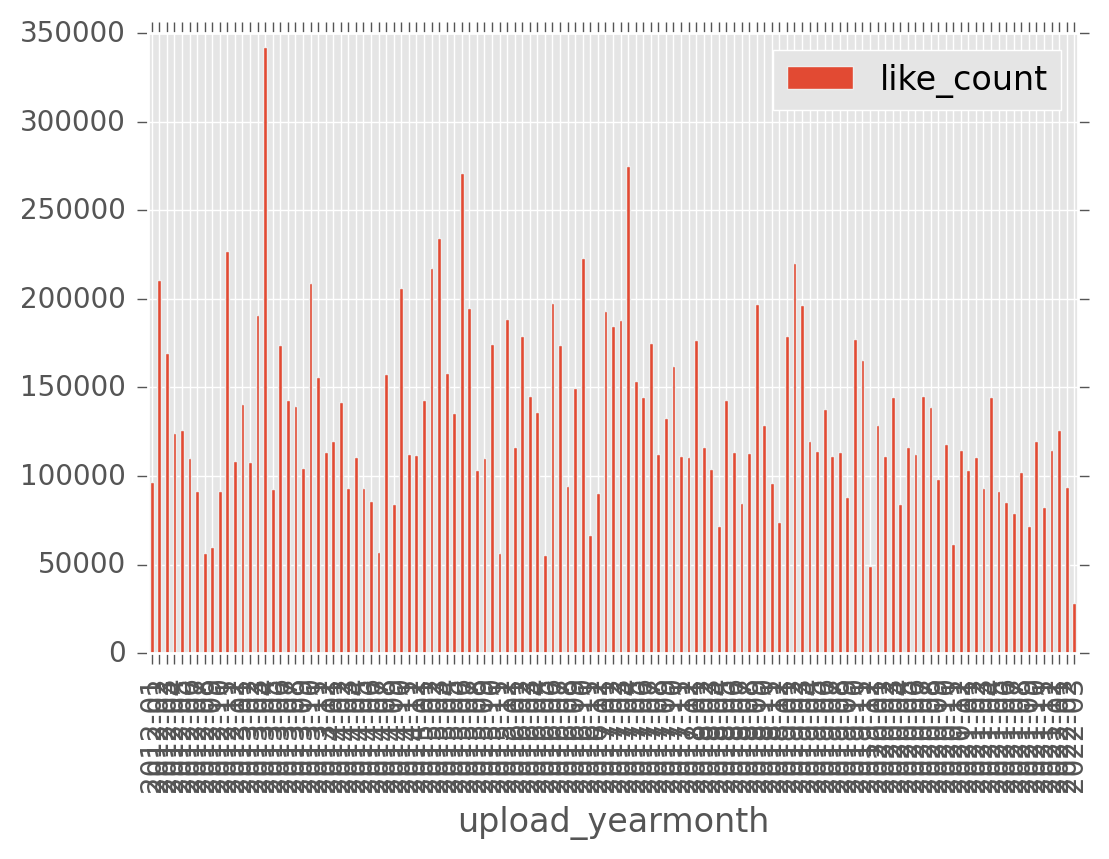

In [59]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')

counts_sum.plot.bar(x='upload_yearmonth', y='like_count')

In [ ]:
df.groupby('upload_yearmonth').sum()

In [ ]:
import numpy as np
import datetime
from user_func import nlp_workflow as nlp